<a href="https://colab.research.google.com/github/andvsilva/CS50-Artificial_Intelligence/blob/master/C%C3%B3pia_de_planets_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuration

* random state = 42
* ML = Random Forest
* Depth = 2
* dataset: confirmed (50%), others (50%)

In [527]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importando bibliotecas

In [528]:
# Pandas
import pandas as pd
# Numpy
import numpy as np 
# Pyplot is a state-based interface to matplotlib. It provides a MATLAB-like way of plotting.
import matplotlib.pyplot as plt
# Display plots that are the output of running code cells  
%matplotlib inline
# Split arrays or matrices into random train and test subsets
#   X_train, X_test, y_train, y_test = train_test_split(
#   ...     X, y, test_size=0.33, random_state=42)
from sklearn.model_selection import train_test_split
# Cross-validation
# scores = cross_val_score(clf, X, y, cv=5)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
from sklearn.model_selection import cross_val_score
# scikit-learn Support vector machines
from sklearn import svm
from sklearn.svm import SVC
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# feature selection:

import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
rstate = 42
np.random.seed(rstate)

# memory management
# garbage collection
import gc

# release memory RAM
def release_memory(df):   
    del df
    gc.collect() 
    df = pd.DataFrame() # point to NULL
    print('memory RAM released.')


# Loading Dataset

* Got to http://exoplanet.eu/catalog/
* Select status confirmed and others
* Download csv

In [529]:
# df = pd.read_csv('exoplanet.eu_catalog.csv', sep=',', index_col=0, encoding='utf-8', decimal='.')
df = pd.read_csv('exoplanet.eu_catalog.csv', sep=',', index_col=0, encoding='utf-8', decimal='.')

In [530]:
df.head(n=10)

,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,radius_error_max,orbital_period,orbital_period_error_min,orbital_period_error_max,semi_major_axis,semi_major_axis_error_min,semi_major_axis_error_max,eccentricity,eccentricity_error_min,eccentricity_error_max,inclination,inclination_error_min,inclination_error_max,angular_distance,discovered,updated,omega,omega_error_min,omega_error_max,tperi,tperi_error_min,tperi_error_max,tconj,tconj_error_min,tconj_error_max,tzero_tr,tzero_tr_error_min,tzero_tr_error_max,tzero_tr_sec,tzero_tr_sec_error_min,tzero_tr_sec_error_max,...,geometric_albedo,geometric_albedo_error_min,geometric_albedo_error_max,log_g,publication,detection_type,mass_detection_type,radius_detection_type,alternate_names,molecules,star_name,ra,dec,mag_v,mag_i,mag_j,mag_h,mag_k,star_distance,star_distance_error_min,star_distance_error_max,star_metallicity,star_metallicity_error_min,star_metallicity_error_max,star_mass,star_mass_error_min,star_mass_error_max,star_radius,star_radius_error_min,star_radius_error_max,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
# name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Com b,Confirmed,NaN,NaN,NaN,19.40,1.50,1.50,NaN,NaN,NaN,326.03,0.32,0.32,1.29,0.05,0.05,0.231,0.005,0.005,NaN,NaN,NaN,0.011664,2008.0,2015-08-21,94.80,1.50,1.50,2452899.60,1.60,1.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Published in a refereed paper,Radial Velocity,NaN,NaN,NaN,NaN,11 Com,185.179167,17.792778,4.74,NaN,NaN,NaN,NaN,110.60,10.50,10.50,-0.350,0.090,0.090,2.7000,0.300,0.300,19.000,2.000,2.000,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN
11 Oph b,Confirmed,21.00,3.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN,730000.00,365000.00,365000.00,243.00,55.00,55.00,NaN,NaN,NaN,NaN,NaN,NaN,1.675862,2007.0,2018-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Published in a refereed paper,Imaging,NaN,NaN,Oph 1622-2405 b,NaN,11 Oph,245.604167,-24.087222,NaN,NaN,NaN,NaN,14.03,145.00,20.00,20.00,NaN,NaN,NaN,0.0162,0.005,0.005,NaN,NaN,NaN,M9,0.011,0.002,0.002,2375.0,175.0,175.0,NaN,NaN,"Oph 1622-2405, Oph 11A"
11 UMi b,Confirmed,NaN,NaN,NaN,10.50,2.47,2.47,NaN,NaN,NaN,516.22,3.25,3.25,1.54,0.07,0.07,0.080,0.030,0.030,NaN,NaN,NaN,0.012887,2009.0,2009-08-12,117.63,21.06,21.06,2452861.05,2.06,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Published in a refereed paper,Radial Velocity,NaN,NaN,NaN,NaN,11 UMi,229.275000,71.823889,5.02,NaN,NaN,NaN,NaN,119.50,6.90,6.90,0.040,0.040,0.040,1.8000,0.250,0.250,24.080,1.840,1.840,K4III,1.560,0.540,0.540,4340.0,70.0,70.0,NaN,NaN,NaN
11 Uma b,Unconfirmed,3.72,0.82,0.82,NaN,NaN,NaN,NaN,NaN,NaN,651.90,7.10,7.10,1.56,0.07,0.07,0.700,0.070,0.070,NaN,NaN,NaN,0.049367,2008.0,2010-11-25,6.24,8.90,8.90,53469.30,5.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Published in a refereed paper,Default,NaN,NaN,NaN,NaN,11 Uma,137.095833,66.873333,5.16,NaN,NaN,NaN,NaN,31.60,2.90,2.90,-0.245,0.040,0.040,1.8100,0.195,0.195,36.300,4.200,4.200,K5III,NaN,NaN,NaN,4090.0,70.0,70.0,NaN,NaN,NaN
14 And b,Confirmed,NaN,NaN,NaN,5.33,0.57,0.57,NaN,NaN,NaN,185.84,0.23,0.23,0.83,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.010864,2008.0,2014-08-27,NaN,NaN,NaN,2452861.40,1.50,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Published in a refereed paper,Radial Velocity,NaN,NaN,NaN,NaN,14 And,352.820833,39.236111,5.22,4.1,3.02,2.61,2.33,76.40,4.10,4.10,-0.240,NaN,NaN,2.2000,0.200,0.200,11.000,1.000,1.000,K0III,NaN,NaN,NaN,4813.0,20.0,20.0,NaN,NaN,NaN
14 Her b,Confirmed,NaN,NaN,NaN,4.64,0.19,0.19,NaN,NaN,NaN,1773.40,2.50,2.50,2.77,0.05,0.05,0.369,0.005,0.005,NaN,NaN,NaN,0.153039,2002.0,2014-08-27,22.60,0.90,0.90,2451372.70,3.60,3.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Published in a referee

In [531]:
# 2021-04-10 - andsilva
# shape dataset 
df.shape

(7408, 97)

In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7408 entries, 11 Com b to zet Del B
Data columns (total 97 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   planet_status               7408 non-null   object 
 1   mass                        1595 non-null   float64
 2   mass_error_min              1411 non-null   float64
 3   mass_error_max              1388 non-null   float64
 4   mass_sini                   1106 non-null   float64
 5   mass_sini_error_min         941 non-null    float64
 6   mass_sini_error_max         940 non-null    float64
 7   radius                      5907 non-null   float64
 8   radius_error_min            5726 non-null   float64
 9   radius_error_max            5726 non-null   float64
 10  orbital_period              7076 non-null   float64
 11  orbital_period_error_min    6690 non-null   float64
 12  orbital_period_error_max    6692 non-null   float64
 13  semi_major_axis           

# Fill nan with zeros

In [533]:
df = df.fillna(0)

In [534]:
def to_target(x):
  if x == 'Confirmed':
       return 1.0
  else:
       return 0.0

df['planet_status'] = df['planet_status'].apply(to_target)

In [535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7408 entries, 11 Com b to zet Del B
Data columns (total 97 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   planet_status               7408 non-null   float64
 1   mass                        7408 non-null   float64
 2   mass_error_min              7408 non-null   float64
 3   mass_error_max              7408 non-null   float64
 4   mass_sini                   7408 non-null   float64
 5   mass_sini_error_min         7408 non-null   float64
 6   mass_sini_error_max         7408 non-null   float64
 7   radius                      7408 non-null   float64
 8   radius_error_min            7408 non-null   float64
 9   radius_error_max            7408 non-null   float64
 10  orbital_period              7408 non-null   float64
 11  orbital_period_error_min    7408 non-null   float64
 12  orbital_period_error_max    7408 non-null   float64
 13  semi_major_axis           

In [536]:
# name of the features
df.columns

Index(['planet_status', 'mass', 'mass_error_min', 'mass_error_max',
       'mass_sini', 'mass_sini_error_min', 'mass_sini_error_max', 'radius',
       'radius_error_min', 'radius_error_max', 'orbital_period',
       'orbital_period_error_min', 'orbital_period_error_max',
       'semi_major_axis', 'semi_major_axis_error_min',
       'semi_major_axis_error_max', 'eccentricity', 'eccentricity_error_min',
       'eccentricity_error_max', 'inclination', 'inclination_error_min',
       'inclination_error_max', 'angular_distance', 'discovered', 'updated',
       'omega', 'omega_error_min', 'omega_error_max', 'tperi',
       'tperi_error_min', 'tperi_error_max', 'tconj', 'tconj_error_min',
       'tconj_error_max', 'tzero_tr', 'tzero_tr_error_min',
       'tzero_tr_error_max', 'tzero_tr_sec', 'tzero_tr_sec_error_min',
       'tzero_tr_sec_error_max', 'lambda_angle', 'lambda_angle_error_min',
       'lambda_angle_error_max', 'impact_parameter',
       'impact_parameter_error_min', 'impact_param

In [537]:
# target : 'planet_status'

In [538]:
print('Confirmed {}%'.format((df['planet_status'].sum()*100) / 45-67))

Confirmed 10395.222222222223%


In [539]:
for col in list(df.columns):
    if type(df[col][0]) == str:
        print('\nColumn {}'.format(col))
        print('Dummy Columns: {}'.format(df[col].value_counts().shape))


Column updated
Dummy Columns: (814,)

Column publication
Dummy Columns: (4,)

Column detection_type
Dummy Columns: (8,)

Column star_name
Dummy Columns: (5887,)

Column star_sp_type
Dummy Columns: (372,)


In [540]:
if 'drops' not in globals() or 'drop_updated' not in locals() :
    df = df.drop('star_name', 1)
    df = df.drop('star_sp_type', 1)
    df = df.drop('updated', 1)
    drops = True

In [541]:
idx_name = df.index.name
print(idx_name)
for col in list(df.columns):
    if type(df[col][0]) == str:
        print('\nColumn {}'.format(col))
        print(df[col].value_counts().shape)
        df = pd.merge(df, pd.get_dummies(df[col]), on=idx_name) 
        df = df.drop(col, 1)
    
df.info()

# name

Column publication
(4,)

Column detection_type
(8,)
<class 'pandas.core.frame.DataFrame'>
Index: 7408 entries, 11 Com b to zet Del B
Columns: 104 entries, planet_status to Timing
dtypes: float64(85), object(7), uint8(12)
memory usage: 5.3+ MB


In [542]:
for col in list(df.columns):
    if 'Astrometry' not in col:
        try:
            if df[col].dtype == 'O':
                print('\nColumn {}'.format(col))
                print(df[col].value_counts().shape[0])
                if df[col].value_counts().shape[0] < 10:
                    df = pd.merge(df, pd.get_dummies(df[col]), on=idx_name) 
                else:
                    print('\tDroped: {}'.format(col))

                df = df.drop(col, 1)
        except:
            pass


Column mass_detection_type
8

Column radius_detection_type
4

Column alternate_names
3152
	Droped: alternate_names

Column molecules
50
	Droped: molecules

Column star_detected_disc
3

Column star_magnetic_field
3

Column star_alternate_names
4462
	Droped: star_alternate_names


In [543]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
planet_status,7408.0,0.635529,0.481314,0.0,0.0,1.0,1.0,1.0
mass,7408.0,1.490212,8.791519,0.0,0.0,0.0,0.0,280.0
mass_error_min,7408.0,inf,NaN,0.0,0.0,0.0,0.0,inf
mass_error_max,7408.0,inf,NaN,0.0,0.0,0.0,0.0,inf
mass_sini,7408.0,0.599745,3.540469,0.0,0.0,0.0,0.0,63.3
...,...,...,...,...,...,...,...,...
IR Excess,7408.0,0.009314,0.096066,0.0,0.0,0.0,0.0,1.0
Imaging_y,7408.0,0.006210,0.078561,0.0,0.0,0.0,0.0,1.0
0_y,7408.0,0.999190,0.028450,0.0,1.0,1.0,1.0,1.0
No,7408.0,0.000135,0.011618,0.0,0.0,0.0,0.0,1.0


In [544]:
# number of lines before remove NaN and inf
lines_before = df.shape[0]
lines_before

7408

# Drop inf, -inf and NAN

In [545]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

In [546]:
# lines after drop
lines_after = df.shape[0]

# Number of lines removed
lines_removed = lines_before - lines_after
lines_removed

86

In [547]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
planet_status,7322.0,0.633843,0.481786,0.0,0.0,1.0,1.0,1.0
mass,7322.0,1.463033,8.782015,0.0,0.0,0.0,0.0,280.0
mass_error_min,7322.0,0.322089,2.873761,0.0,0.0,0.0,0.0,150.0
mass_error_max,7322.0,0.463684,4.639111,0.0,0.0,0.0,0.0,173.9
mass_sini,7322.0,0.599708,3.551539,0.0,0.0,0.0,0.0,63.3
...,...,...,...,...,...,...,...,...
IR Excess,7322.0,0.009014,0.094519,0.0,0.0,0.0,0.0,1.0
Imaging_y,7322.0,0.006009,0.077292,0.0,0.0,0.0,0.0,1.0
0_y,7322.0,0.999181,0.028616,0.0,1.0,1.0,1.0,1.0
No,7322.0,0.000137,0.011687,0.0,0.0,0.0,0.0,1.0


In [548]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 7322 entries, 11 Com b to zet Del B
Data columns (total 115 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   planet_status                           float64
 1   mass                                    float64
 2   mass_error_min                          float64
 3   mass_error_max                          float64
 4   mass_sini                               float64
 5   mass_sini_error_min                     float64
 6   mass_sini_error_max                     float64
 7   radius                                  float64
 8   radius_error_min                        float64
 9   radius_error_max                        float64
 10  orbital_period                          float64
 11  orbital_period_error_min                float64
 12  orbital_period_error_max                float64
 13  semi_major_axis                         float64
 14  semi_major_axis_error_min       

### Data Visualization — Heatmaps

reference: https://medium.com/@rokaandy/python-data-visualization-heatmaps-79fa7506c410

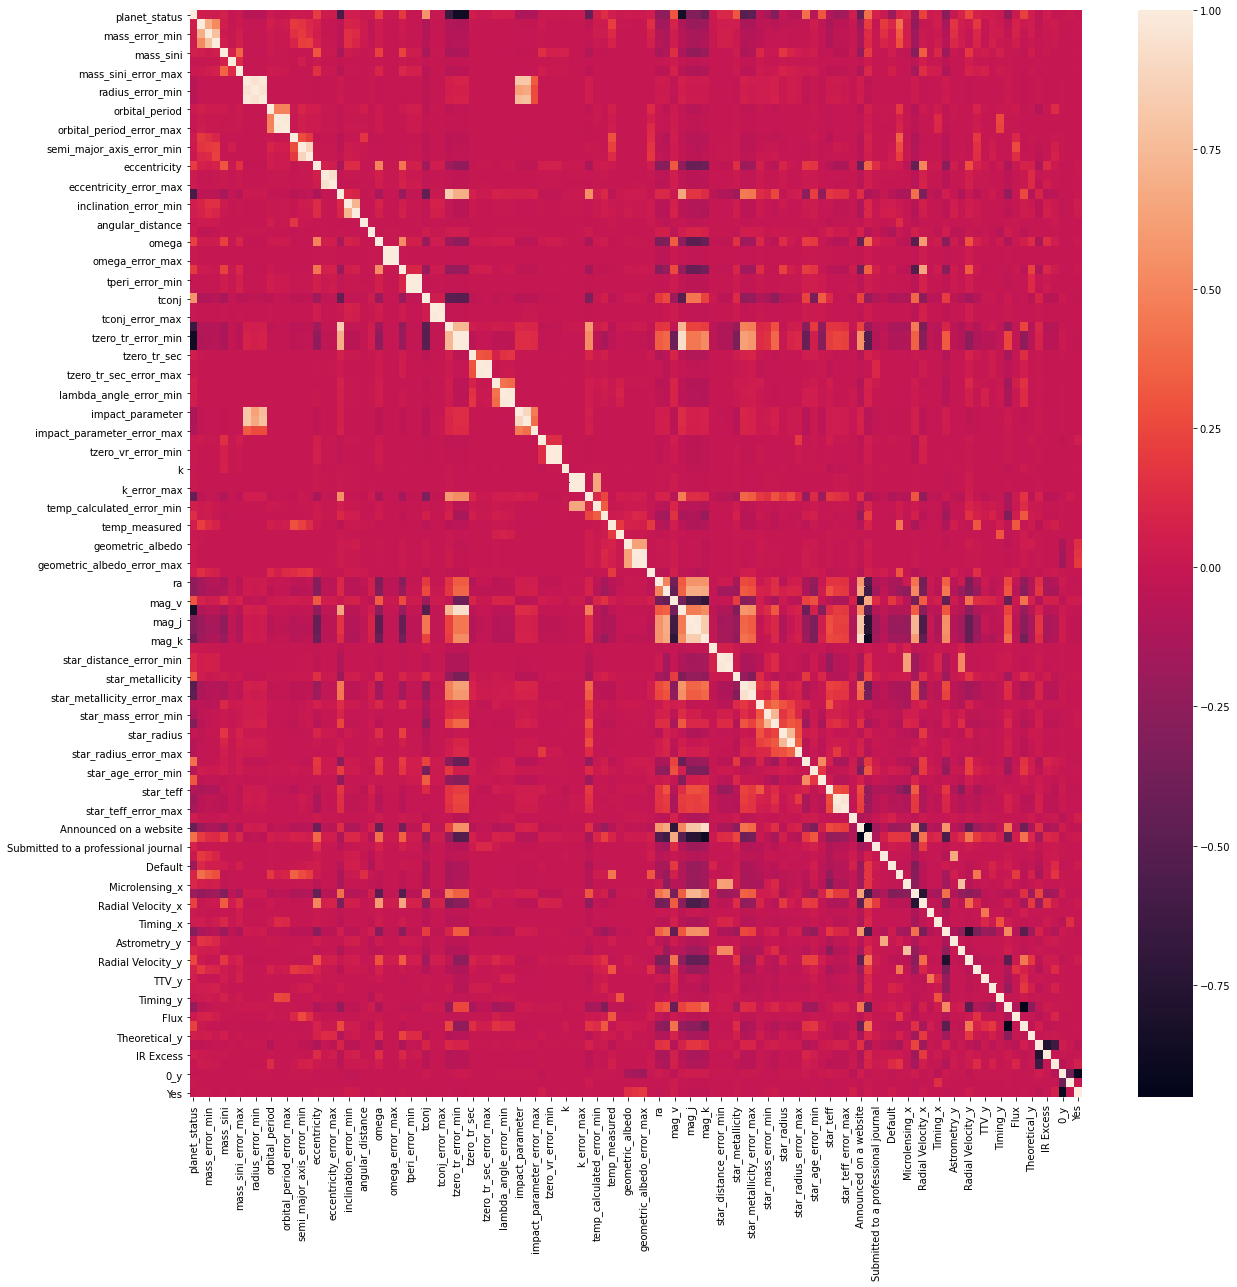

In [549]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr()) # seaborn // author: andsilva
plt.show()

In [550]:
df['planet_status'].value_counts()

1.0    4641
0.0    2681
Name: planet_status, dtype: int64

In [551]:
df = df.sort_values(by=['planet_status'])
df_balanced = df.iloc[0:df['planet_status'].value_counts()[0]*2, :]

# releasy memory RAM
release_memory(df)

memory RAM released.


In [552]:
X = df_balanced.iloc[:, 1:]
y = df_balanced.iloc[:, 0] # target: planet_status.

# releasy memory RAM
release_memory(df_balanced)

print('Sample 0, X')
print(X.iloc[0, :])
print('Sample 0, y')
print(y.iloc[0])

memory RAM released.
Sample 0, X
mass                   0.0
mass_error_min         0.0
mass_error_max         0.0
mass_sini              0.0
mass_sini_error_min    0.0
                      ... 
IR Excess              0.0
Imaging_y              0.0
0_y                    1.0
No                     0.0
Yes                    0.0
Name: K07489.01, Length: 114, dtype: float64
Sample 0, y
0.0


In [553]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rstate)

In [554]:
clf = RandomForestClassifier(max_depth=2, random_state=rstate)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

## Feature Importance

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

reference: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

[1.25520998e-03 3.10849674e-03 3.13669066e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.18120869e-03 5.49207392e-04
 1.75104034e-03 0.00000000e+00 2.18650407e-04 2.89041657e-04
 3.77837755e-03 2.13554233e-02 1.05476783e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.71124558e-02 0.00000000e+00
 9.09054211e-03 0.00000000e+00 3.01013957e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.67035673e-02 7.85705389e-03 3.84010645e-02
 5.49442470e-02 1.38315824e-01 9.52017913e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.38086499e-04 1.49485059e-02 1.77032971e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.89289293e-03 0.00000000e+00 1.95244101e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.96670793e-03
 1.44371145e-04 8.11408596e-03 1.16421712e-01 1.56207940e-03
 2.30463541e-03 8.001220

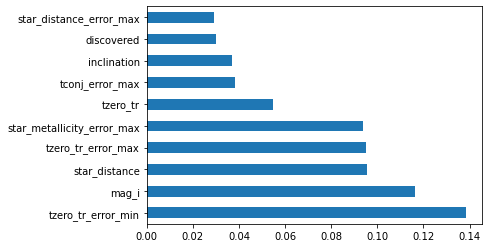

In [555]:
print(clf.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Cross-validation

In [556]:
scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.93 (+/- 0.11)


# Reference

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html

[[731  94]
 [ 18 766]]


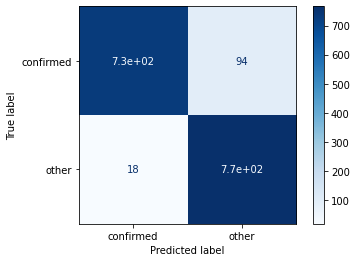

In [557]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test, display_labels=['confirmed', 'other'], cmap=plt.cm.Blues)